In [1]:
#24/7/24 For the implementation of SVM in Padel Mutagen Dataw

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import sys
sys.path.insert(1, '/Users/james/Documents/Honours/Python')
from Function_Repo import metriccalc
from Function_Repo import nnmetrics
import matplotlib.pyplot as plt

#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
seed = 81
datasets = []
index = []
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/Padel/mutagen_padel.csv')
targetdata = targetdata.dropna(axis=0)

#Splitting data into 5 folds 
dfarray = targetdata.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed, stratify = targetdata['Toxicity_Value'])

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 1 best mcc of 0.14619716384151749 with an mtry of 3 on test set


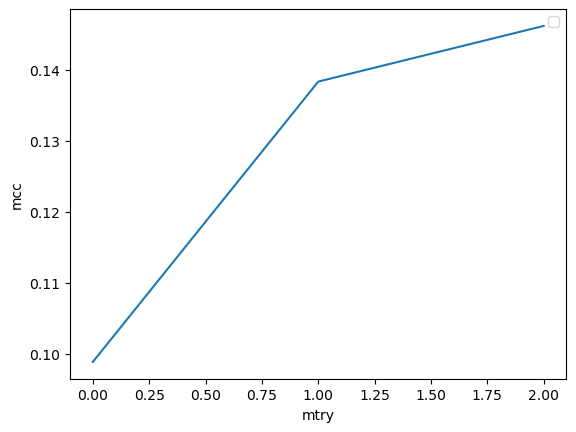

for model 1 validation metrics of:
positives in data 177
negatives in data 175 

fn count = 11
tn count = 23
tp count = 166
fp count = 152 

net accuracy = 0.5369318181818182
positive accuracy = 0.9378531073446328
negative accuracy = 0.13142857142857142 

fpr = 0.8685714285714285
tpr = 0.9378531073446328 

f1 score = 0.6707070707070707
mcc = 0.11726571113374981
cohen Kappa = 0.06959849516767205


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 2 best mcc of 0.10437439749824393 with an mtry of 1 on test set


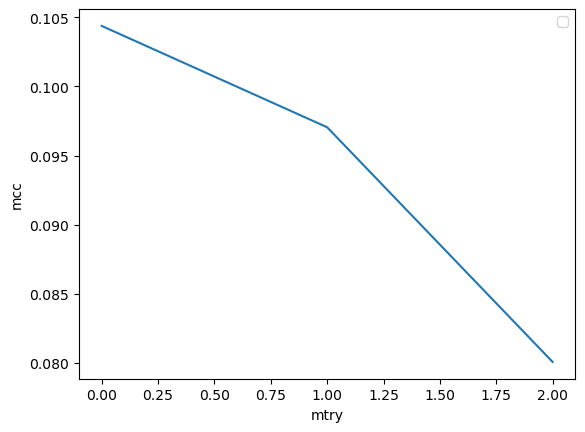

for model 2 validation metrics of:
positives in data 182
negatives in data 170 

fn count = 11
tn count = 17
tp count = 171
fp count = 153 

net accuracy = 0.5340909090909091
positive accuracy = 0.9395604395604396
negative accuracy = 0.1 

fpr = 0.9
tpr = 0.9395604395604396 

f1 score = 0.6758893280632411
mcc = 0.07305833027953698
cohen Kappa = 0.040680670034565276


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 3 best mcc of 0.10397504898200727 with an mtry of 1 on test set


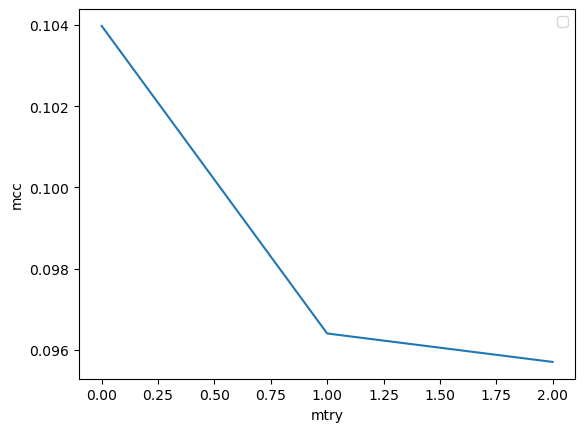

for model 3 validation metrics of:
positives in data 167
negatives in data 185 

fn count = 8
tn count = 15
tp count = 159
fp count = 170 

net accuracy = 0.4943181818181818
positive accuracy = 0.9520958083832335
negative accuracy = 0.08108108108108109 

fpr = 0.918918918918919
tpr = 0.9520958083832335 

f1 score = 0.6411290322580645
mcc = 0.06703751368576073
cohen Kappa = 0.03168176057861713


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 4 best mcc of 0.0245317469447702 with an mtry of 3 on test set


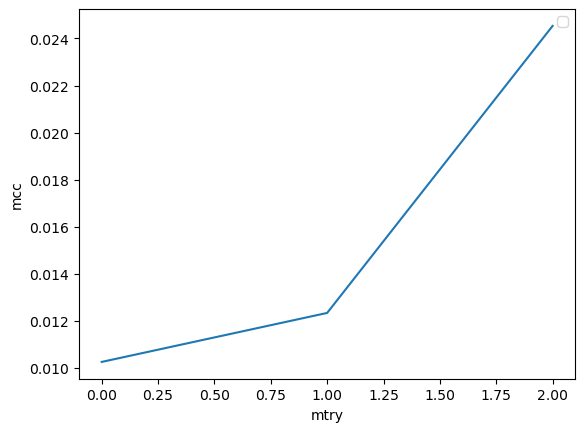

for model 4 validation metrics of:
positives in data 184
negatives in data 168 

fn count = 12
tn count = 14
tp count = 172
fp count = 154 

net accuracy = 0.5284090909090909
positive accuracy = 0.9347826086956522
negative accuracy = 0.08333333333333333 

fpr = 0.9166666666666666
tpr = 0.9347826086956522 

f1 score = 0.6745098039215687
mcc = 0.03459624791813702
cohen Kappa = 0.018807092960773777


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 5 best mcc of 0.12370978805481665 with an mtry of 2 on test set


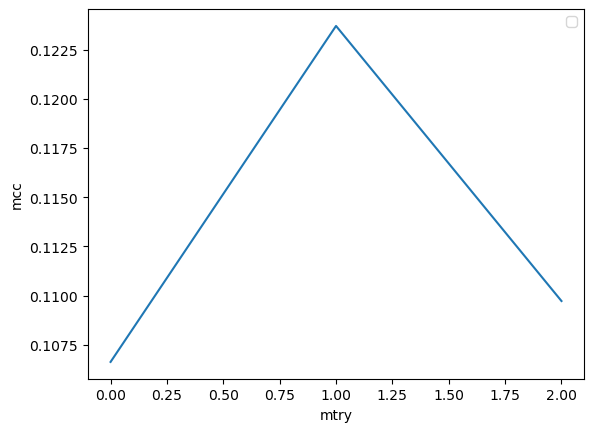

for model 5 validation metrics of:
positives in data 187
negatives in data 163 

fn count = 9
tn count = 8
tp count = 178
fp count = 155 

net accuracy = 0.5314285714285715
positive accuracy = 0.9518716577540107
negative accuracy = 0.049079754601226995 

fpr = 0.950920245398773
tpr = 0.9518716577540107 

f1 score = 0.6846153846153846
mcc = 0.002207683516271874
cohen Kappa = 0.0010094329771311219


In [2]:
from sklearn import svm
import math
model_list = []
validlist = []
totalmetrics = []
testdat = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    
    #lists of metric values
    mcclist = []
    bestmetrics = 0
    maxval = 0
    for mtry in range(1, 4):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        SVM = svm.SVC(C=1, kernel='poly', gamma='scale',degree = mtry,
              coef0=0.4, shrinking=True, probability=False, 
              tol=0.001, cache_size=200, class_weight=None, 
              verbose=False, max_iter=-1, decision_function_shape='ovr', 
              break_ties=False, random_state=seed)

        model= SVM.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    
    SVM = svm.SVC(C=1, kernel='sigmoid', gamma='scale', degree = bestmetrics,
              coef0=0.4, shrinking=True, probability=False, 
              tol=0.001, cache_size=200, class_weight=None, 
              verbose=False, max_iter=-1, decision_function_shape='ovr', 
              break_ties=False, random_state=seed)
    model_list.append(SVM)
    testdat.append(maxval)
    totalmetrics.append(mcclist)
    print('for fold', split + 1, 'best mcc of', maxval, 'with an mtry of', bestmetrics, 'on test set')
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()
    
    #check models onto validation set, printing various metrics
    model= SVM.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    results = metriccalc(preds, yvalid)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [9]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
validdat = []
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = metriccalc(preds, y)
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1
    validdat.append(results[12])

model 1 validation metrics of:
positives in data 455
negatives in data 423 

fn count = 27
tn count = 31
tp count = 428
fp count = 392 

net accuracy = 0.5227790432801822
positive accuracy = 0.9406593406593406
negative accuracy = 0.07328605200945626 

fpr = 0.9267139479905437
tpr = 0.9406593406593406 

f1 score = 0.6713725490196079
mcc = 0.028053413070879222
cohen Kappa = 0.014381781647689216 

model 2 validation metrics of:
positives in data 455
negatives in data 423 

fn count = 27
tn count = 31
tp count = 428
fp count = 392 

net accuracy = 0.5227790432801822
positive accuracy = 0.9406593406593406
negative accuracy = 0.07328605200945626 

fpr = 0.9267139479905437
tpr = 0.9406593406593406 

f1 score = 0.6713725490196079
mcc = 0.028053413070879222
cohen Kappa = 0.014381781647689216 

model 3 validation metrics of:
positives in data 455
negatives in data 423 

fn count = 27
tn count = 29
tp count = 428
fp count = 394 

net accuracy = 0.520501138952164
positive accuracy = 0.940659340659

In [10]:
#get x and y values for the final validation set

toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])

In [11]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    predlist = []
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 455
negatives in data 423 

fn count = 27
tn count = 31
tp count = 428
fp count = 392 

net accuracy = 0.5227790432801822
positive accuracy = 0.9406593406593406
negative accuracy = 0.07328605200945626 

fpr = 0.9267139479905437
tpr = 0.9406593406593406 

f1 score = 0.6713725490196079
mcc = 0.028053413070879222
cohen Kappa = 0.014381781647689216


In [6]:
#with open('/Users/james/Documents/Honours/practhesisprep/figure prep/radarplotdata.txt', 'a') as f:
#    print('Chemopy Mutagen RF Consensus MCC =', results[12] , file=f)

In [7]:
validdat

[0.028053413070879222,
 0.028053413070879222,
 0.018847242184052773,
 0.009336355386892342,
 0.028053413070879222]

In [8]:
testdat

[0.14619716384151749,
 0.10437439749824393,
 0.10397504898200727,
 0.0245317469447702,
 0.12370978805481665]